# DRILL:

Let's say we work at a credit card company and we're trying to figure out if people are going to pay their bills on time. We have everyone's purchases, split into 4 main categories: groceries, dining out, utilities, and entertainment. What are some ways you might use KNN to create this model? What aspects of KNN would be useful? Write up your thoughts and submit a link below.

For creating our model, we can add in a binary variable (1/0) for on-time bill payment. Each of the 4 spending categories can be treated as a feature and amount spent/billed in each cateogory as dimension. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
%matplotlib inline

# Sample data
credit = pd.DataFrame()
credit['default'] = [0, 0, 0, 1, 1, 1] #1 indicating customer defaulted
credit['groceries'] = [8, 9, 9, 4, 5, 5]
credit['dining_out'] = [6, 7, 7, 9, 10, 10]
credit['utilities'] = [2, 3, 3, 2, 3, 3]
credit['entertainment'] = [4, 5, 5, 7, 8, 8]
credit.head(6)

,default,groceries,dining_out,utilities,entertainment
0,0,8,6,2,4
1,0,9,7,3,5
2,0,9,7,3,5
3,1,4,9,2,7
4,1,5,10,3,8
5,1,5,10,3,8


In [2]:
neighbors = KNeighborsClassifier(n_neighbors=3)
X = credit[['groceries', 'dining_out', 'utilities', 'entertainment']]
Y = credit.default
neighbors.fit(X, Y)

# Predict for a customer default with:
#    groceries: 6
#    dining_out: 8
#    utilities: 3
#    entertainment: 6

neighbors.predict([[6, 7, 3, 6]])    

array([0], dtype=int64)

We can customize our dimensions as such:

In [3]:
neighbors = KNeighborsClassifier(n_neighbors=3)
X = credit[['groceries', 'dining_out']]
Y = credit.default
neighbors.fit(X, Y)
print(neighbors.predict([[6, 7]]))

X = credit[['utilities', 'entertainment']]
neighbors.fit(X, Y)
print(neighbors.predict([[6, 7]]))

X = credit[['groceries', 'dining_out', 'entertainment']]
neighbors.fit(X, Y)
print(neighbors.predict([[6, 7, 6]]))

[0]
[1]
[0]


We can group groceries & dining_out spending to a "food" dimension:

In [4]:
credit['food'] = credit.apply(lambda row:
                              row.groceries + row.dining_out, axis=1)

In [5]:
X = credit[['utilities', 'entertainment', 'food']]
neighbors.fit(X, Y)
print(neighbors.predict([[6, 7, 15]]))

[1]


Additionally, we could look into customer income and create dimensions of spending category as a % of total income. KNN is useful as we are able to explicitly view the decision point as to whether the customer will default or not.

It may be useful to weight by distance, so that closer datapoints have a higher weight than further ones.

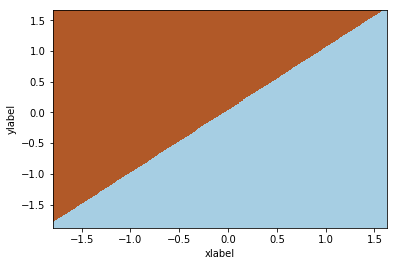

In [14]:
# Sample data
credit = pd.DataFrame()
credit['default'] = [0, 0, 0, 1, 1, 1] #1 indicating customer defaulted
credit['groceries'] = [8, 9, 9, 4, 5, 5]
credit['dining_out'] = [6, 7, 7, 9, 10, 10]
credit['utilities'] = [2, 3, 3, 2, 3, 3]
credit['entertainment'] = [4, 5, 5, 7, 8, 8]
#credit.head(6)

# Weight by distance.
neighbors = KNeighborsClassifier(n_neighbors=3, weights='distance')
X = pd.DataFrame({
    'groceries': stats.zscore(credit.groceries),
    'dining_out': stats.zscore(credit.dining_out),
#    'utilities': stats.zscore(credit.utilities),
#    'entertainment': stats.zscore(credit.entertainment)
})

# Fit our model.
Y = credit.default
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('groceries')
plt.ylabel('dining_out')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()